In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

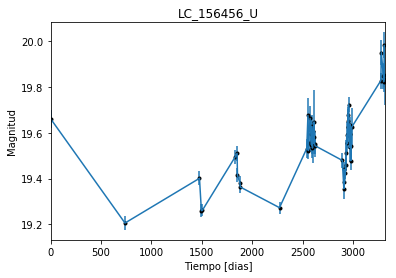

In [2]:
data = np.genfromtxt('LC_156456_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_156456_U')
plt.savefig("LC_156456_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

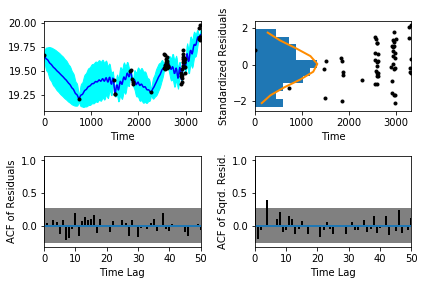

In [5]:
sample.assess_fit()

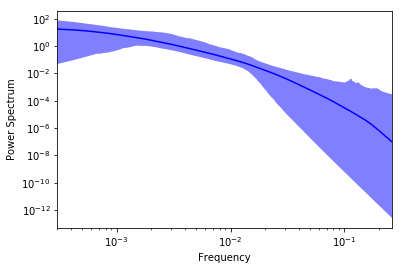

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

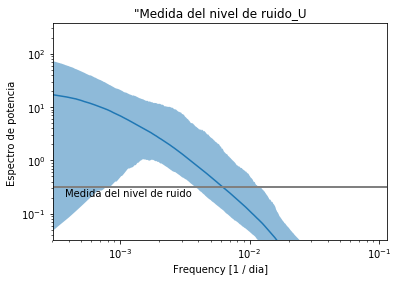

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_156456_U')
plt.title('"Medida del nivel de ruido_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_156456_U')

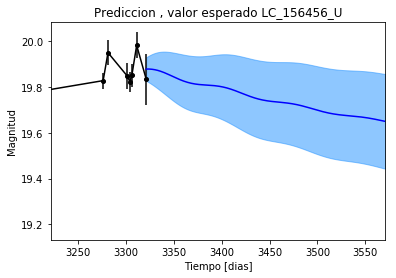

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_156456_U')

Text(0.5,1,'Prediccion, Caminos simulados  LC_156456_U')

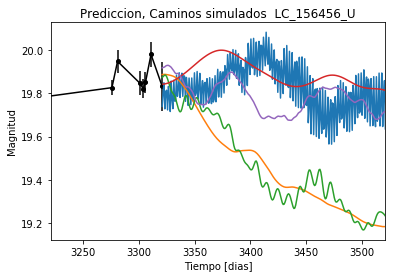

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_156456_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


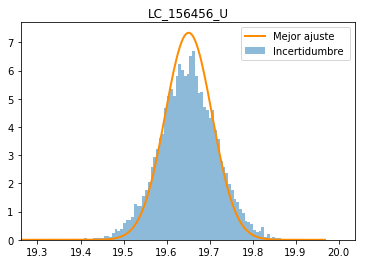

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_156456_U')
plt.savefig("Mejor_ajuste_LC_156456_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_156456_U')

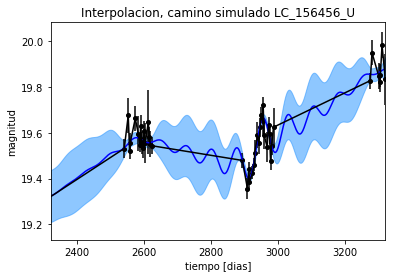

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_156456_U')

Text(0.5,1,'Interpolacion, camino simulado LC_156456_U')

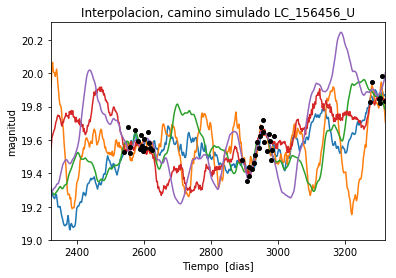

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_156456_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 779.519701499
Median: 0.0147470576717
Standard deviation: 0.106368459714
68% credibility interval: [ 0.00160849  0.12982891]
95% credibility interval: [ 0.00042749  0.41987996]
99% credibility interval: [  3.22378550e-04   5.01857146e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 656.443131591
Median: 0.00775557596071
Standard deviation: 0.0666213703697
68% credibility interval: [ 0.00098283  0.05882482]
95% credibility interval: [ 0.00037666  0.24184717]
99% credibility interval: [  3.17429724e-04   4.45772942e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 538.428542821
Median: 0.038437397976
Standard deviation: 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1312.66020899
Median: 82.6870479573
Standard deviation: 1.68201751084
68% credibility interval: [ 80.83749022  83.82317758]
95% credibility interval: [ 78.3093921   84.88908732]
99% credibility interval: [ 75.97882632  85.53974426]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 395.733744372
Median: 0.763753555315
Standard deviation: 1.30599736203
68% credibility interval: [ 0.13480582  2.55547972]
95% credibility interval: [ 0.02670768  4.53994088]
99% credibility interval: [ 0.01134866  6.32187084]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 478.366099708
Median: 0.649839115457
Standard deviation: 3.26137575741
68% credibility interval: [ 0.0270717   5.17223259]
95% credibility interval: [  6.23300774e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20010.916158
Median: 2.79586428318e-32
Standard deviation: 2.01625567557e+84
68% credibility interval: [  4.35010492e-89   1.41651517e-02]
95% credibility interval: [  2.43822719e-125   1.26050068e+041]
99% credibility interval: [  2.82830819e-131   2.40163354e+077]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1883.62745268
Median: 19.4911270617
Standard deviation: 0.0986172896161
68% credibility interval: [ 19.4064762   19.57571094]
95% credibility interval: [ 19.29292468  19.6948622 ]
99% credibility interval: [ 19.19274901  19.81492273]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 331.9737433
Median: 0.0365537081099
Standard deviation: 0.149463083118
68% credibility interval: [ 0.          0.30634091]
95% credibility interval: [ 0.          0.47832555]
99% credibility interval: [ 0.          0.51769148]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 331.9737433
Median: 0.0365537081099
Standard deviation: 0.149463083118
68% credibility interval: [ 0.          0.30634091]
95% credibility interval: [ 0.          0.47832555]
99% credibility interval: [ 0.          0.51769148]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 245.140727139
Median: 0.0
Standard deviation: 0.00103726563505
68% credibi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1312.66020899
Median: 82.6870479573
Standard deviation: 1.68201751084
68% credibility interval: [ 80.83749022  83.82317758]
95% credibility interval: [ 78.3093921   84.88908732]
99% credibility interval: [ 75.97882632  85.53974426]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1787.65470184
Median: 0.0513935059997
Standard deviation: 0.0376459864635
68% credibility interval: [ 0.0324828   0.08634269]
95% credibility interval: [ 0.0224308   0.14814067]
99% credibility interval: [ 0.01756293  0.23757181]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2728.82204458
Median: 1.05762410005
Standard deviation: 0.184330531917
68% credibility interval: [ 0.89397734  1.24912921]
95% credibility interval: [ 0.74435836  1.47392888]
99% credibility interval: [ 0.67678518  1.65626214]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 550.754586652
Median: 0.00142789214727
Standard deviation: 0.0540429444559
68% credibility interval: [  5.53790590e-06   2.46955844e-02]
95% credibility interval: [  1.99828518e-45   1.43603709e-01]
99% credibility interval: [  1.97590105e-80   3.59037945e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 779.519701499
Median: (-0.0926584960869-2.88862219752j)
Standard deviation: 1.15264280847
68% credibility interval: [-0.81573908-0.94037503j -0.01010647-2.34656709j]
95% credibility interval: [-2.63818357-0.04248886j -0.00268602-0.71505164j]
99% credibility interval: [ -3.15326145e+00+0.j          -2.02556417e-03-0.33765452j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 656.443131591
Median: (-0.0487297209251+0.0966781970547j)
Standard deviation: 1.02817220003
68% credibility interval: [-0.36960727+3.05351045j -0.00617527+0.06039119j]
95% credibility interval: [-1.51957057+3.20195429j -0.00236664+0.69950898j]
99% credibility interval: [ -2.80087400e+00+2.84187087j  -1.99446978e-03+2.7364134j ]
Posterior summary for 